In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import cm as cm

In [3]:
ano_15 = pd.read_csv("../datasets/15.csv")
ano_16 = pd.read_csv("../datasets/16.csv")
ano_17 = pd.read_csv("../datasets/17.csv")

# Importando o CSV de desemprego

In [4]:
desemprego = pd.read_csv("../datasets/desemprego.csv")
desemprego.head(5)

,Country Name,Country Code,2010,2011,2012,2013,2014
0,Afghanistan,AFG,20.600000,20.900000,19.700001,21.100000,20.799999
1,Angola,AGO,10.800000,10.700000,10.700000,10.600000,10.500000
2,Albania,ALB,25.799999,27.000000,28.299999,28.700001,29.200001
3,Arab World,ARB,25.022214,28.117516,29.113212,29.335306,29.704569
4,United Arab Emirates,ARE,9.800000,9.800000,9.800000,9.900000,10.000000


## Eliminamos as colunas do código do pais e os anos 2010 a 2012

In [5]:
desemprego_13 = desemprego.drop(["Country Code", "2010", "2011", "2012", "2014"], axis=1)
desemprego_14 = desemprego.drop(["Country Code", "2010", "2011", "2012", "2013"], axis=1)

desemprego_13.head(5)

,Country Name,2013
0,Afghanistan,21.100000
1,Angola,10.600000
2,Albania,28.700001
3,Arab World,29.335306
4,United Arab Emirates,9.900000


# Crio um novo data frame para juntar a novo coluna de "desemprego"

Utilizando a função concat do pandas conseguimos juntar a data frame do ranking de felicidade com o de indice de desemprego nas colunas indices indicadas como sendo a do pais


In [6]:

ano_com_desemprego = pd.concat([ano_15.set_index("Country"), desemprego_14.set_index("Country Name")], axis=1, join="inner")
ano_com_desemprego.head(4)


,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,2014
Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,8.7
Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,10.9
Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,12.4
Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,8.4


In [7]:
print ("Shape antes {}".format(ano_15.shape))
print ("Shape depois {}".format(ano_com_desemprego.shape))

Shape antes (158, 12)
Shape depois (137, 12)


**Depois de ter adicionado a coluna de desemprego perdemos os dados de 21 paises**

In [8]:
ano_com_desemprego.head(5)

,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,2014
Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,8.7
Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,10.9
Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,12.4
Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,8.4
Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,13.4


In [24]:

ano_com_desemprego.plot(kind='scatter',x='Happiness..Rank',y='2014',mode='markers',size=4)

KeyError: 'Happiness..Rank'

### Na medida que diminue o desemprego aumenta o índice de liberdade.

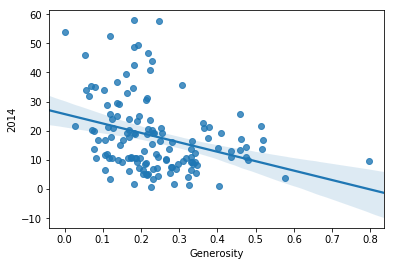

In [12]:
sns.regplot(x=ano_com_desemprego["Generosity"], y=ano_com_desemprego["2014"])

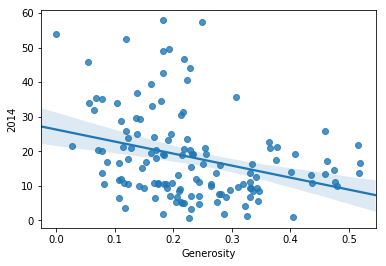

In [13]:
sem_extra_generosidade = ano_com_desemprego[ano_com_desemprego["Generosity"]<0.55]
desemprego_menor_40 = ano_com_desemprego[ano_com_desemprego["2014"]<40]
sns.regplot(x=sem_extra_generosidade["Generosity"], y=sem_extra_generosidade["2014"])

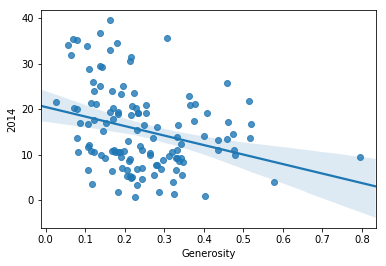

In [14]:
sns.regplot(x=desemprego_menor_40["Generosity"], y=desemprego_menor_40["2014"])

['Western Europe' 'North America' 'Australia and New Zealand'
 'Middle East and Northern Africa' 'Latin America and Caribbean'
 'Southeastern Asia' 'Central and Eastern Europe' 'Eastern Asia'
 'Sub-Saharan Africa' 'Southern Asia']


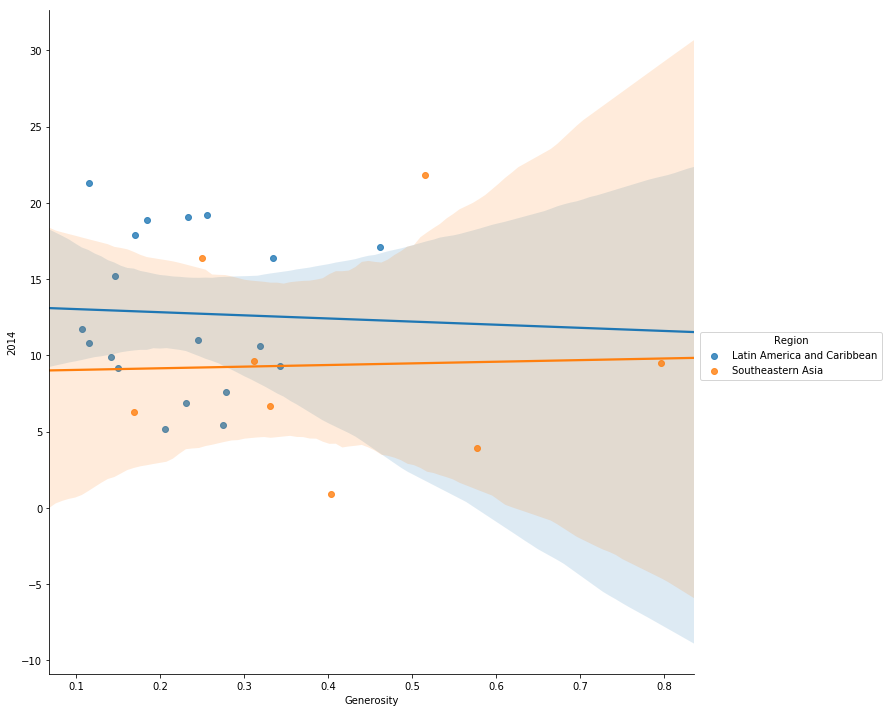

In [15]:
# analisamos o indice de generocidade de america latina e Asia

generosidade = ano_com_desemprego[ano_com_desemprego["Region"].str.match("Southeastern Asia|Latin America and Caribbean")]
print(ano_com_desemprego.Region.unique())

# eliminando extremos no indice de desemprego 
generosidade = generosidade[generosidade["2014"]<25]
sns.lmplot(x="Generosity", y="2014", hue="Region", data=generosidade, scatter=True, size=10);

### Pearson

In [16]:
from scipy import stats
stats.pearsonr(ano_com_desemprego["Generosity"], ano_com_desemprego["2014"])

(-0.31912097441550036, 0.00014419306234634535)

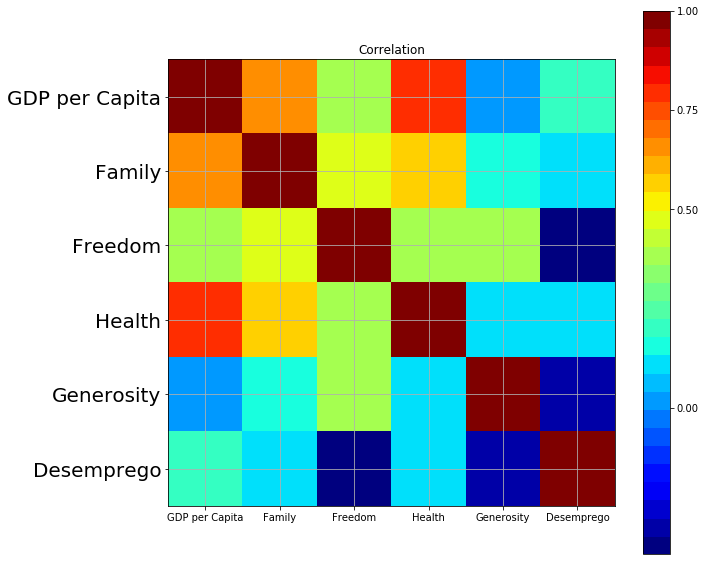

In [21]:
df1 = ano_com_desemprego[['Economy (GDP per Capita)','Family','Freedom','Health (Life Expectancy)','Generosity','2014']]

fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(111)
cmap = cm.get_cmap('jet', 30)
cax = ax1.imshow(df1.corr(), interpolation="nearest", cmap=cmap)
ax1.grid(True)
plt.title('Correlation')
labels=['', 'GDP per Capita','Family', 'Freedom','Health','Generosity','Desemprego']

ax1.set_xticklabels(labels,fontsize=10)
ax1.set_yticklabels(labels,fontsize=20)

# Add colorbar, make sure to specify tick locations to match desired ticklabels
fig.colorbar(cax, ticks=[-1,-0.75, -.5,0,.5,.75,1])


A correlaçao do indice de desemprego se mostro relacionado em algum grau com os indices de liberdade e generosidade e gdp(Freedom e Generosity). Por tanto podemos afirmar que diminuindo o indice de desemprego influenciaria positivamente no percepção das pessoas no relacionada aos aspectos de Liberdade e generosidade

In [34]:
ano_com_desemprego[["Economy (GDP per Capita)",'Freedom', 'Generosity', '2014']][:17]

,Economy (GDP per Capita),Freedom,Generosity,2014
Switzerland,1.39651,0.66557,0.29678,8.700000
Iceland,1.30232,0.62877,0.43630,10.900000
Denmark,1.32548,0.64938,0.34139,12.400000
Norway,1.45900,0.66973,0.34699,8.400000
Canada,1.32629,0.63297,0.45811,13.400000
Finland,1.29025,0.64169,0.23351,19.200001
Netherlands,1.32944,0.61576,0.47610,11.100000
Sweden,1.33171,0.65980,0.36262,22.799999
New Zealand,1.25018,0.63938,0.47501,14.600000
Australia,1.33358,0.65124,0.43562,13.100000


Dos 15 paises que se encontram na frente do Brasil no ranking 
- 11 tem um menor indice de desemprego, 
- 9 desses 11 superam o Brasil no indicador de Liberdade
- todos eles possuem um melhor indice de GDP 

De acordo com os dados analisados podemos relacionar uma melhoria no indice de desemprego impactando em 2 índices diferentes dentre os analisados no ranking de felicidade e portanto, potencialmente, impactando no indice de felicidade e como consequencoa no ranking final do pais. 